In [1]:
MAP_SIZE_X = 16
MAP_SIZE_Y = 16

# TODO Is there a reason we are redefining max? It is provided by the Julia stdlib
function max(a::Int,b::Int)
    if(a>b)
        return a
    else
        return b
    end
end

# TODO Perhaps a switch statement
function nodeValue(char)
    if char == "O"
        return 2;
    elseif char == "I"
        return 6;
    elseif char == "H"
        return 10;
    end
end

function edgeCost(map, start_x, start_y, end_x, end_y)
    # TODO Why is there a max() here?
    return max(nodeValue(map[start_x,start_y],map[start_x,start_y]))
end

# TODO I think these comparisions have an off by one error?
function isValidIndex(x,y)
    # TODO Not sure if this is correct
    # Cannot move from the cell we are to to the same cell
    #if (x == y)
    #    return false;
    #end

    if ((x > 0) && (x <= MAP_SIZE_X) && (y > 0) && (y <= MAP_SIZE_Y))
        return true
    else
        return false
    end
end

# TODO Perhaps a switch?
# We could also wrap this into nodeValue somehow?
function isValidMove(element)
    if((element=="I")||(element=="O")||(element=="H"))
        return true
    else
        return false
    end
end

function checkNeighbour(map, adj_mat, dist_mat, i, j)

    #println("Inputs were x: ", i, " y: ", j);
    # Offsets relative to the cell of interest
    for x_offset in [-1, 0, 1]
        for y_offset in [-1, 0, 1]
            # Set the coordinate of the neighbour we are examining
            x = i + x_offset
            y = j + y_offset

            if (isValidIndex(x,y))

                if isValidMove(map[x,y])
                    
                     #println("\tTRUE ",x," ",y, " ", map[x,y])
                     #println("Calculated values are x  ", (i - 1)*MAP_SIZE_X + j, " y ", (x - 1)*MAP_SIZE_X + y );
                    adj_mat[(i - 1)*MAP_SIZE_X + j, (x - 1)*MAP_SIZE_X + y] = true
                    #adj_mat[(x - 1)*MAP_SIZE_X + y, (i - 1)*MAP_SIZE_X + j] = true
                    #dist_mat[(i-1)*MAP_SIZE_X + j, (x-1)*MAP_SIZE_X + y] = nodeValue(map[x,y])

                    #println("\t\tTRUE ",(i-1)*MAP_SIZE_X + j," ", (x-1)*MAP_SIZE_X + (y));
                    #println("\t\tTRUE ",(i-1)*MAP_SIZE_X + j," ", (x-1)*MAP_SIZE_X + (y)," = ",nodeValue(map[x,y]) );
                else
                    # println("\tFALSE ",x," ",y, " ", map[x,y])
                end
            end
        end
    end
    
    #for i in 1:size(adj_mat)[1]
    #   println(adj_mat[i,:]);
    #end
    #print(adj_mat);
    
    #print(ndims(adj_mat));
    #print(length(adj_mat));
end




fp = open("\SmallWarehouseMap.csv", "r")

map = Array(String,MAP_SIZE_X,MAP_SIZE_Y)
# TODO Do we need the line below?
adj_mat = Array(Bool,MAP_SIZE_X*MAP_SIZE_Y,MAP_SIZE_X*MAP_SIZE_Y)
adj_mat = fill(false, MAP_SIZE_X*MAP_SIZE_Y,MAP_SIZE_X*MAP_SIZE_Y);
#print(adj_mat);
dist_mat = Array(Int64,MAP_SIZE_X*MAP_SIZE_Y,MAP_SIZE_X*MAP_SIZE_Y)
i=1;
j=1;

for i in 1:MAP_SIZE_X
    line = readline(fp)
    # Ensure we don't read more Y values than we intended
    map[i,:] = [strip(string(s)) for s in split(line,",")[1:MAP_SIZE_Y]]
    println(map[i,:]);
end

#node_counter = 1
for i in 1:size(map)[1]
    for j in 1:size(map)[2]
        if((map[i,j]=="I")||(map[i,j]=="O")||(map[i,j]=="H")) 
            #println("TRUE ",i," ",j)
            checkNeighbour(map, adj_mat, dist_mat, i, j)
            #node_counter = node_counter + 1;
        end
    end
end

String["X","X","X","X","X","X","X","X","X","X","X","X","X","X","X","X"]
String["X","I","I","I","I","I","I","I","I","I","I","I","I","I","I","X"]
String["X","I","I","I","I","I","I","I","I","I","I","I","I","I","I","X"]
String["X","I","I","S","S","S","S","S","S","S","S","S","S","I","I","X"]
String["X","I","I","S","S","S","S","S","S","S","S","S","S","I","I","X"]
String["X","I","I","I","I","I","I","I","I","I","I","I","I","I","I","X"]
String["X","I","I","I","I","I","I","I","I","I","I","I","I","I","I","X"]
String["X","I","I","S","S","S","S","S","S","S","S","S","S","I","I","X"]
String["X","I","I","S","S","S","S","S","S","S","S","S","S","I","I","X"]
String["X","I","I","I","I","I","I","I","I","I","I","I","I","I","I","X"]
String["X","I","I","I","I","I","I","I","I","I","I","I","I","I","I","X"]
String["X","I","I","S","S","S","S","S","S","S","S","S","S","I","I","X"]
String["X","I","I","S","S","S","S","S","S","S","S","S","S","I","I","X"]
String["X","I","I","I","I","I","I","I","I","I","I","I","I","I","

(256,256)


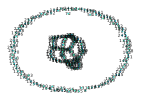

In [18]:
using GraphPlot
using LightGraphs
using Colors
using Compose

G2 = Graph(adj_mat)

path = a_star(G2, 31, 146);
nodefillc = fill(colorant"lightseagreen", 256);

for node in path
    nodefillc[node[1]] = colorant"orange";
end

println(path);

draw(PDF("nodes.pdf", 160cm, 160cm), gplot(G2, nodelabel=1:256, nodefillc=nodefillc))

In [3]:
size(adj_mat)

(256,256)

In [4]:
j=0
for i in 1:MAP_SIZE_X*MAP_SIZE_Y
    if(dist_mat[i]!=0)
        j = j+1
    end
end
j

7